# EXPLORATION 02

## 3. 손글씨 검사


### 1. Imort module

In [10]:
from sklearn.datasets import load_digits # 데이터 불러오기
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score # 정확도 확인
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier # DecisionTree 모델 정의
from sklearn.linear_model import SGDClassifier # SGDClassifier 모델 정의
from sklearn.linear_model import LogisticRegression # Logistic Regression 모델 정의
from sklearn.ensemble import RandomForestClassifier # RandomForest 모델 정의
from sklearn import svm # SVM 모델 정의
from sklearn.metrics import confusion_matrix 
import numpy as np # numpy 정의
import pandas as pd # 데이터프레임을 위한 판다스 정의
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data load

In [11]:
# 데이터 로드
digits = load_digits()
digits_data = digits.data
digits_target = digits.target
bcdf = pd.DataFrame(data=digits_data, columns=digits.feature_names) # 판다스 DataFrame 자료형 변환
# pd.set_option('display.max_columns', None) # 데이터 프레임 생략없이 출력

### 3.Data check

In [12]:
# 데이터 확인
print('분류 : ',digits.keys()) # 키
print('총 데이터 및 특징 갯수 : ',digits_data.shape) 
print('Lable : ',digits.target_names,'\n')  # 타겟(정답)에 이름
print('특징 이름 : ',digits.feature_names,'\n') # 각 특징에 설명

분류 :  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
총 데이터 및 특징 갯수 :  (1797, 64)
Lable :  [0 1 2 3 4 5 6 7 8 9] 

특징 이름 :  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] 

- 손글씨 데이터는 1797로 각각 64개의 특성을 나타내고 있습니다.
- Lable 데이터에 경우 0~9으로 구분되고 있습니다.

In [13]:
bcdf.columns
bcdf.head()       # 데이터 프레임 활용

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
bcdf.describe()   # 데이터 프레임으로 위 코드에 대한 통계

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [15]:
print('데이터 설명 : ',digits.DESCR,'\n') # 데이터에 설명

데이터 설명 :  .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted i

### 4. 데이터 분할

In [16]:
# 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(digits_data,
                                                 digits_target,
                                                 test_size=0.2,
                                                 random_state=13)
print('number of X_train:', len(x_train), 'number of X_test:', len(x_test))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

number of X_train: 1437 number of X_test: 360
(1437, 64) (1437,)
(360, 64) (360,)


- 테스트,훈련 데이터 분할 및 분할 갯수 확인

### 5. 모델 정의

In [17]:
# 모델 정의
decision_tree = DecisionTreeClassifier(random_state=16)
sgd_model = SGDClassifier(random_state=16)
logistic_model = LogisticRegression(random_state=16,solver='liblinear',max_iter=30000)
random_forest = RandomForestClassifier(random_state=16)
svm_model = svm.SVC(random_state=16)

- 각 시드를 16으로 조정하여 결과값 고정
- solver : 최적화 문제에 사용하는 알고리즘 max_iter : 계산에 사용할 작업 수

### 6. 각 모델별 훈련 및 예측

In [18]:
digits_accuracy = {}

# 
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print('[Decision Tree Classifier]\n\n',classification_report(y_test,y_pred))
digits_accuracy['Decision Tree Classifier'] = accuracy_score(y_test,y_pred)

sgd_model.fit(x_train,y_train)
y_pred = sgd_model.predict(x_test)
print('\n\n[SGD Classifier]\n\n',classification_report(y_test,y_pred))
digits_accuracy['SGD Classifier'] = accuracy_score(y_test,y_pred)

logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
print('\n\n[Logistic Regression Classifier]\n\n',classification_report(y_test,y_pred,labels=np.unique(y_pred))) # ,한 번 예측 될  경우 관심없음
digits_accuracy['Logistic Regression Classifier'] = accuracy_score(y_test,y_pred)

random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('\n\n[Random Forest Classifier]\n\n',classification_report(y_test,y_pred))
digits_accuracy['Random Forest Classifier'] = accuracy_score(y_test,y_pred)

svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print('\n\n[SVM Classifier]\n\n',classification_report(y_test,y_pred))
digits_accuracy['SVM Classifier'] = accuracy_score(y_test,y_pred)


[Decision Tree Classifier]

               precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.80      0.76      0.78        37
           2       0.97      0.84      0.90        38
           3       0.80      0.89      0.85        37
           4       0.87      0.87      0.87        38
           5       0.98      0.91      0.94        45
           6       0.93      0.95      0.94        42
           7       0.86      0.92      0.89        26
           8       0.85      0.82      0.84        34
           9       0.74      0.85      0.79        33

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.88       360



[SGD Classifier]

               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.81      0.95      0.88        37
           2       0.97     

In [19]:
for i in digits_accuracy.items():
    print(f"{i[0]:<20} : {i[1]}")
    

Decision Tree Classifier : 0.875
SGD Classifier       : 0.925
Logistic Regression Classifier : 0.9472222222222222
Random Forest Classifier : 0.9777777777777777
SVM Classifier       : 0.9833333333333333


- 단순히 정확도를 기준으로 보면 Random Forest Classifier 모델이 가장 높게 나왔다.
- 하지만 더 다양한 측정 기준을 사용해보자

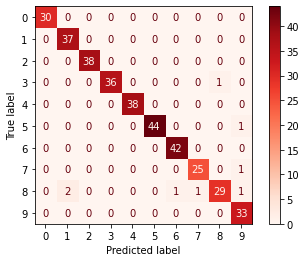

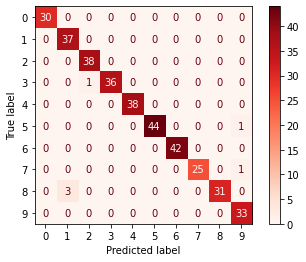

In [25]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(random_forest, x_test, y_test, values_format='d',display_labels=digits.target_names,cmap=plt.cm.Reds)
plot_confusion_matrix(svm_model, x_test, y_test, values_format='d',display_labels=digits.target_names,cmap=plt.cm.Reds)

- Confusion matrix를 시각화 한 결과이다
0~9까지 정확도를 봤을때 5번이 가장 높게 나왔다는걸 알 수 있다.

## 7.프로젝트 정리

     손글씨에 경우 0~9까지 각각의 데이터를 취합했을때 5번 데이터가 가장 높게 나왔다는걸 알 수 있다.
    
     정확도면에서 Random_Forest와 SVM Classifier정확도가 우수하나 각각의 데이터로 봤을때 SVM 모델이 더 우수하게 나왔기에 
     손글씨 예측은 SVM 모델을 5개의 모델중 추천한다.